# Bisection and Newton's Method

## Bisection method

The main idea behind this algorithm is to find the root of a function. That is, for what value(s) of the argument(s) does the function, $f=0$?

The algorithm is basically just successively splitting a region over which we *think* that function should go to zero in half until we find that point.  

The bisection method is straightforward and reliable, but it is limited and not very fast for large search regions.

## Bisection algorithm

Suppose $f$ is a continuous function defined on the interval $[a,b]$, with $f(a)$ and $f(b)$ of opposite sign. In other words:

$$f(a)f(b) < 0$$

We know that there exists a number $p$ in $(a,b)$ with $f(p)=0$. 

To find such $p$, set $a_1=a$ and $b_1=b$, and let $p_1$ be the midpoint in between a and b: 

$$p_1=\dfrac{(a_1+b_1)}{2}$$

1) If $f(p_1)=0$, then $p=p_1$, we are done;

2) If $f(p_1)$  and  $f(a_1)$ have the same sign, $p \in (p_1,b_1)$, and we set $a_2=p_1$ and $b_2=b_1$;

3) Similarly, If $f(p_1)$  and  $f(a_1)$ have opposite signs, $p \in (p_1,b_1)$, and we set $a_2=a_1$ and $b_2=p_1$;

4) Iterate the process above in the following intervals: $[a_2, b_2]$, $[a_3, b_3]$...$[a_i, b_i]$;

5) Set the error tolerance, the loop will be terminate if $$\dfrac{(a_i+b_i)}{2}< tolerance.$$

## Difficulties

The bisection method is straightforward and reliable, but it can be slow if you don’t have a good initial guess for the interval.

If there is no root in the chosen interval, then it does not matter what you do.

The method also uses no information whatsoever about the size of the step to take with each iteration. The overall time is determined only by the size of the initial interval (i.e. how good your guess is) and the tolerance, $\epsilon$


## Bisection exercises

Let's play with this a bit!

In [1]:
import numpy as np
from scipy.misc import derivative
import matplotlib.pyplot as plt
%matplotlib inline

### Define a function

I have provided a bunch of possibilities here, but please just come up with your own!

In [33]:
def f(x):
    #y = x - 1.9
    #y = x ** 3 + 4 * x ** 2 - 10   
    y = x ** 2 - 2
    #y = np.tanh(x)**2 + x/2.
    #y = np.log(x)
    #y = np.tanh(x)**2 + np.tanh(0.5*x**2) + x/2. - 1.
    return(y)

### Code up the bisection algorithm

1. Setup a `while` loop that iterates until $f(p) = 0$ or $(b-a)<$ tolerance
1. Evaluate the function $f$ at the left end point
1. Compute the midpoint of the interval: $p = (a+b)/2$
1. Evaluate the function $f$ at $p$
1. If $f(p) = 0$ or $(b-a)<$ tolerance, then print out some information and exit the `while` loop (can use `return p`)
1. Otherwise, update the endpoints of the interval using the condition that if $f(a)*f(p) > 0$ then we are to the left of the zero-point, and thus we should update $a\rightarrow p$. Vice versa in the case that $f(a)*f(p) < 0$

In [34]:
def bisection(a, b, tol, max_it):
    i = 1
    while i <= max_it:
        i += 1
        fa = f(a)
        p = (a+b)/2
        fp = f(p)
        if (fa==0):
            return a
        elif (fp==0 or ((b-a) < tol)):
            print("Num iters = %d" % i)
            return p
        if (fa*fp > 0):
            a = p
        else:
            b = p
    print('max num iteration exceeded')
    return(-999)

### Propose a range over which to search

Pick your endpoints that you think define an interval over which the function goes to zero

In [35]:
xleft  = 1
xright = 2

In [36]:
p = bisection(xleft, xright, 0.001, 100)
print(" Root of f(x) = %f" % p)
print("Value of f(p) = %f at p = %f" % (f(p), p))

Num iters = 12
 Root of f(x) = 1.414551
Value of f(p) = 0.000954 at p = 1.414551


## Newton's Method

Newton's method is an iterative process for finding the roots of a function.

The concept is to

- guess a starting $x$ point $(x_1)$
- find a linear equation that's tangent to and passes through $f(x_1)$
- move to the x intercept
- repeat


### Newton's Method in action

Let's use the <i>point-slope</i> form of a linear equation

$$
y - y_1 = m(x - x_1)
$$

We have a point $x_1$ and $f(x_1)=y_1$

and a slope $m= f'(x_1)$

so let's plug in and find the $x$ intercept

$$
y - f(x_1) = f'(x_1)(x - x_1)
$$

Set $y=0$ and solve for $x_2$

$$
 - f(x_1) = f'(x_1)(x_2 - x_1)
$$

$$
-\frac{f(x_1)}{f'(x_1)} = x_2 - x_1
$$

$$
x_2 = x_1 - \frac{f(x_1)}{f'(x_1)}
$$

or in general terms

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

## Newton's method exercises

Let's look at this method now

In [17]:
import numpy as np
from scipy.misc import derivative
import matplotlib.pyplot as plt
%matplotlib inline

### Tangent line

This function determines a linear function whose slope is equal to the first derivative of the function at the point at which it's evaluated; that is, this function determines the tangent line for a given function.

**NOTE**: *This uses the definition of the function that you provided above!*

In [18]:
def f_line(f, x, x_n):
    slope = derivative(f, x_n, dx=0.1)
    x_nn  = x_n - f(x_n) / slope 
    return slope * (x - x_n) + f(x_n), x_nn

### Coding up Newton's algorithm

This is slightly more complex in order to show the actual lines, so let's just get to it!


In [19]:
def runNewton(startingpoint, order):

    x = np.linspace(-10, 10, 500)
    
    x_n = startingpoint
    ax.clear()
    ax.plot(x, f(x), label='mystery function')
    ax.axhline(0, color='gray', lw=0.5)

    for i in range(0, order):

        if i >= 1:
            ax.plot(x, f_l, '--', lw=1)
        
        ax.plot(x_n, f(x_n), 'kd', label=r'$f(x_{}={:.3f})={:.4f}$'.format(i + 1, x_n, f(x_n)))
        ax.vlines(x_n, 0, f(x_n), color='black', linestyle=':', lw=1)
        f_l, x_n = f_line(f, x, x_n)

        
    #plt.setp(ax, xticks=[0, 1, 2], xticklabels=['0', '1', '2'],
    #         yticks=[-1, 0, 1], yticklabels=['-1', '0', '+1'])
    ax.set_ylim(-3, 3)
    ax.set_xlim(-8, 8)
    ax.legend(loc="lower right")
    plt.show()

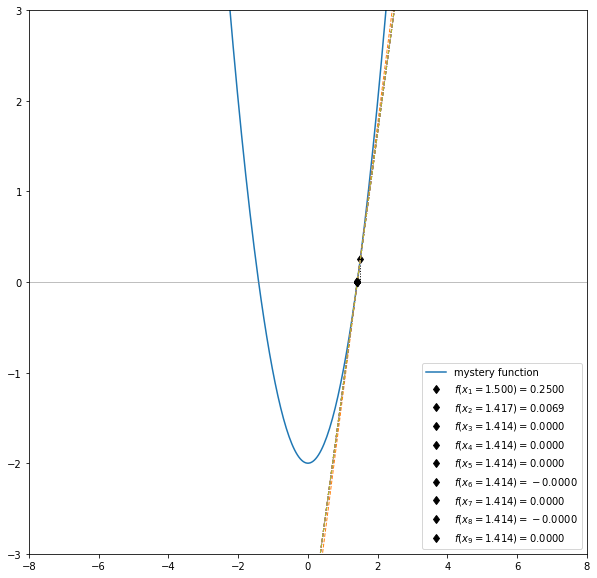

In [20]:
fig, ax = plt.subplots(1,1,figsize=(10, 10))
runNewton(1.5,9)

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10, 10))
runNewton(-0.3,9)